## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [What is the ratio of males vs females in the organization?](#section401)<br/>
    - 4.2 [How many unique skills we have in the organization?](#section402)<br/>
    - 4.3 [What is the corelation between the different columns in the dataset?](#section403)<br/>
    - 4.4 [What is the ratio Male and Female in the different skill sets?](#section404)<br/>
    - 4.5 [What is the distribution of ratings based on the Skill Sets? Does Rating depends on Skill Sets?](#section405)<br/>
    - 4.6 [What are the ratios of people falling under the different buckets of performance ratings?](#section406)<br/>
    - 4.7 [How is the work life balance in the organisation?](#section407)<br/>
    - 4.8 [What is the impact of Gender or Total Experience on the Monthly Income?](#section408)<br/>
    - 4.9 [Who has got better ratings Females or Males?](#section409)<br/>
    - 4.10 [Does the Years at Company is impacted by Total Years of Experience?](#section410)<br/>
    - 4.11 [What is the average hike amount people have got in monthly income based on ratings?](#section411)<br/>
5. [Observations/Conclusions](#section5)

<a id=section1></a>

### 1. Problem Statement

Here we will be analysing the Employee Data of company 'ABC' in order to understand the trends in data from different aspects of employer and employee. We will be performing the following steps to derive the patterns and conclusions from the given data:
    1.) Load the Data
    2.) Do a pre-analysis of data which helps us to understand below points:
        2.1) If there is any missing or bad data. 
        2.2  What is the behaviour of different individual columns. What kind of relations we can
             see between different columns.
        2.3) If a missing data is important from the business perspective we need to understand 
             how we can fetch the value of missing data or can we replace it from mean/median or mode.
             Depends on business importance of missing data and in some cases
             missing data could also be obvious. For example if we are looking and travellers data set some records
             could have driving license number missing which is quite obvious if our data also have of people under
             age of 16 which are not supposed to drive or may be the person dosen't drives at all.
        2.4) The above mentioned logic also applies true for the bad data cases. We might
              want to get rid of the records having missing or bad data in some of the scenerios
              based on business logics and rules.
    3.) After we do the preanalysis we will try to fix the gaps in the data and
        do an analysis again to make sure the fixes we have done has left the data
        clean now ready for analysis.
    4.) After analysing the columns and relations between the columns we derive certain questions
        which help us conclude the patterns from the data set using graphs and charts.

<a id=section2></a>

### 2. Data Loading and Description

Importing the necessary packages to perform the EDA

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

Importing the Dataset

In [39]:
employee_data = pd.read_csv("E:\\Minu\\GCDAI\\DATA SETS\\Employee data.csv")#I have given the local path since was facing issues while loading from github
#employee_data = pd.read_csv("https://github.com/insaid2018/Term-1/tree/master/Data/Projects/Employee data.csv") 

<a id=section3></a>

## 3. Data Profiling

. In the upcoming sections we will first understand our dataset using various pandas functionalities.
. Then with the help of pandas profiling we will find which columns of our dataset need preprocessing.
. In preprocessing we will deal with erronous and missing values of columns. 
. Again we will do pandas profiling to see how preprocessing have transformed our dataset.

<a id=section301></a>

### 3.1 Understanding the Dataset

In [40]:
employee_data.shape

(1470, 9)

This Employee data set has got 1470 rows and 9 columns

In [41]:
employee_data.columns

Index(['Gender', 'Employee Number', 'Skills', 'Total Working Years',
       'Work Life Balance', 'Performance Rating', 'Years At Company',
       'MonthlyIncome(June-2018)', 'MonthlyIncome(June-2017)'],
      dtype='object')

In [42]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
Gender                      1470 non-null object
Employee Number             1470 non-null int64
Skills                      1470 non-null object
Total Working Years         1470 non-null int64
Work Life Balance           1470 non-null int64
Performance Rating          1470 non-null int64
Years At Company            1470 non-null int64
MonthlyIncome(June-2018)    1470 non-null int64
MonthlyIncome(June-2017)    1470 non-null int64
dtypes: int64(7), object(2)
memory usage: 103.4+ KB


In [43]:
employee_data.describe()

,Employee Number,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2017)
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,11.279592,2.761224,3.116327,7.008163,6502.931293,6503.476871
std,602.024335,7.780782,0.706476,0.437447,6.126525,4707.956783,4706.952696
min,1.000000,0.000000,1.000000,1.000000,0.000000,1009.000000,1009.000000
25%,491.250000,6.000000,2.000000,3.000000,3.000000,2911.000000,2914.750000
50%,1020.500000,10.000000,3.000000,3.000000,5.000000,4919.000000,4919.000000
75%,1555.750000,15.000000,3.000000,3.000000,9.000000,8379.000000,8379.000000
max,2068.000000,40.000000,4.000000,4.000000,40.000000,19999.000000,19999.000000


In [44]:
employee_data.head()

,Gender,Employee Number,Skills,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2017)
0,Female,1,Sales,8,1,3,6,5993,5893
1,Female,5,Research,8,3,3,8,5130,4000
2,Female,10,Content Writing,12,2,4,1,2090,3050
3,Female,15,Content Writing,10,3,3,9,2909,5909
4,Female,20,Sales,10,3,2,10,3468,2468


In [45]:
employee_data.tail()

,Gender,Employee Number,Skills,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2017)
1465,Male,2061,Content Writing,17,3,3,5,2571,2571
1466,Male,2062,Employee relations,9,3,3,7,9991,9991
1467,Male,2064,Sales,6,3,4,6,6142,6142
1468,Male,2065,Sales,17,2,3,9,5390,5390
1469,Male,2068,Content Writing,6,4,3,4,4404,4404


<a id=section302></a>

### 3.2 Pre Profiling

In [9]:
profile=pandas_profiling.ProfileReport(employee_data)
profile.to_file(outputfile="employee_data_preprofiling.html")

Above we have done the pre profiling of the employee dataset and stored the results into the file named "employee_data_preprofiling.html".
This pre profiling helps us in understanding the missing/bad instances of values in the given data set.
Also this provides the corelation details between the different columns in the data.
It gives us visual interpretation of each column in the data.
Spread of the data can be better understood by the distribution plot. 
Grannular level analysis of each column.

<a id=section303></a>

### 3.3 Preprocessing

By using the pandas pre profiling we have understood the below points about our data:

1.) There are no missing values in our data which is a good point.
2.) The column years at the company has around 3% zeros. This scenerio is perfectly fine because their could be certain employees in the company who have just came few months back and yet to finish their year in the organization.


So as the data we have got in hand looks good we can directly start EDA on the data and the data dosen't needs any kind of pre processing before the EDA. Also since we are not doing any changes in the data we don't need the post profiling step and we can skip it.

<a id=section304></a>

### 3.4 Post Profiling

<a id=section4></a>

### 4. Questions/Observations

<a id=section401></a>

### 4.1 What is the ratio of males vs females in the organization?

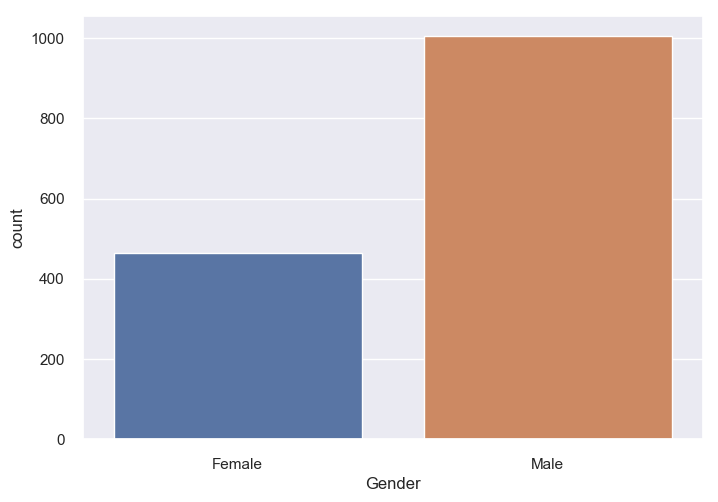

In [10]:
sns.set(style="darkgrid")

ax=sns.countplot(x="Gender",data=employee_data)

From the above polot it seems we have higher population of male as compared to females.

<a id="section402"></a>

### 4.2 How many unique skills we have in the organization?

In [11]:
employee_data.Skills.nunique()

7

So we have 7 unique skill sets in the organisation.

<a id="section403"/>

### 4.3 What is the corelation between the different columns in the dataset?

Text(0.5, 1.0, 'Correlation between features')

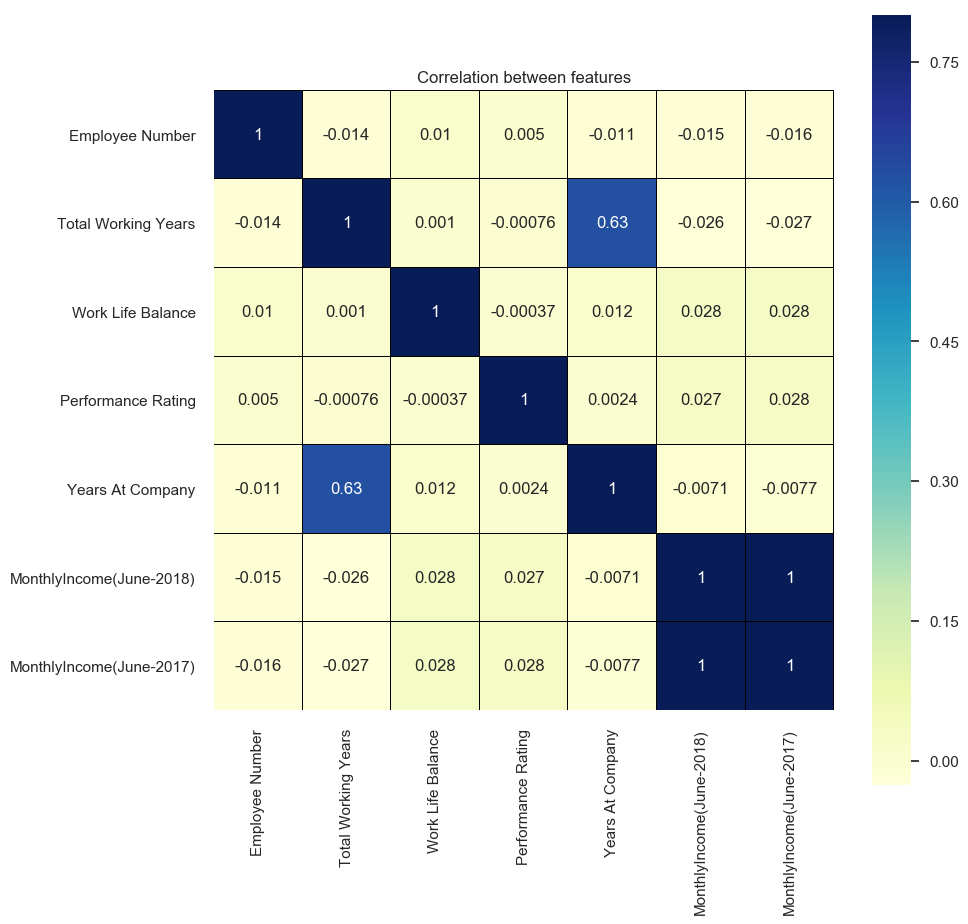

In [46]:
corr = employee_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')


1.) There is a very strong co-relation between the june montly incomes in year of 2018 and 2017 which seems to show very less pay hike. we will dig down this details in upcoming sections.
2.) Also there seems to be strong coorelation between the "Total Years of Experience" and "Years in the company". We will try to get further details in this in the coming sections.

<a id="section404"></a>

### 4.4 What is the ratio Male and Female in the different skill sets?

In [13]:
(employee_data.Gender=='Female').sum()

465

In [14]:
(employee_data.Gender=='Male').sum()

1005

In [15]:
employee_data['Skills'][employee_data['Gender']=='Male'].value_counts()

Sales                     377
Research                  194
Content Writing           187
Employee relations         92
Workforce Management       61
Delivery                   54
Performance Management     40
Name: Skills, dtype: int64

In [16]:
employee_data['Skills'][employee_data['Gender']=='Female'].value_counts()

Sales                     177
Research                   98
Content Writing            72
Workforce Management       41
Employee relations         39
Delivery                   26
Performance Management     12
Name: Skills, dtype: int64

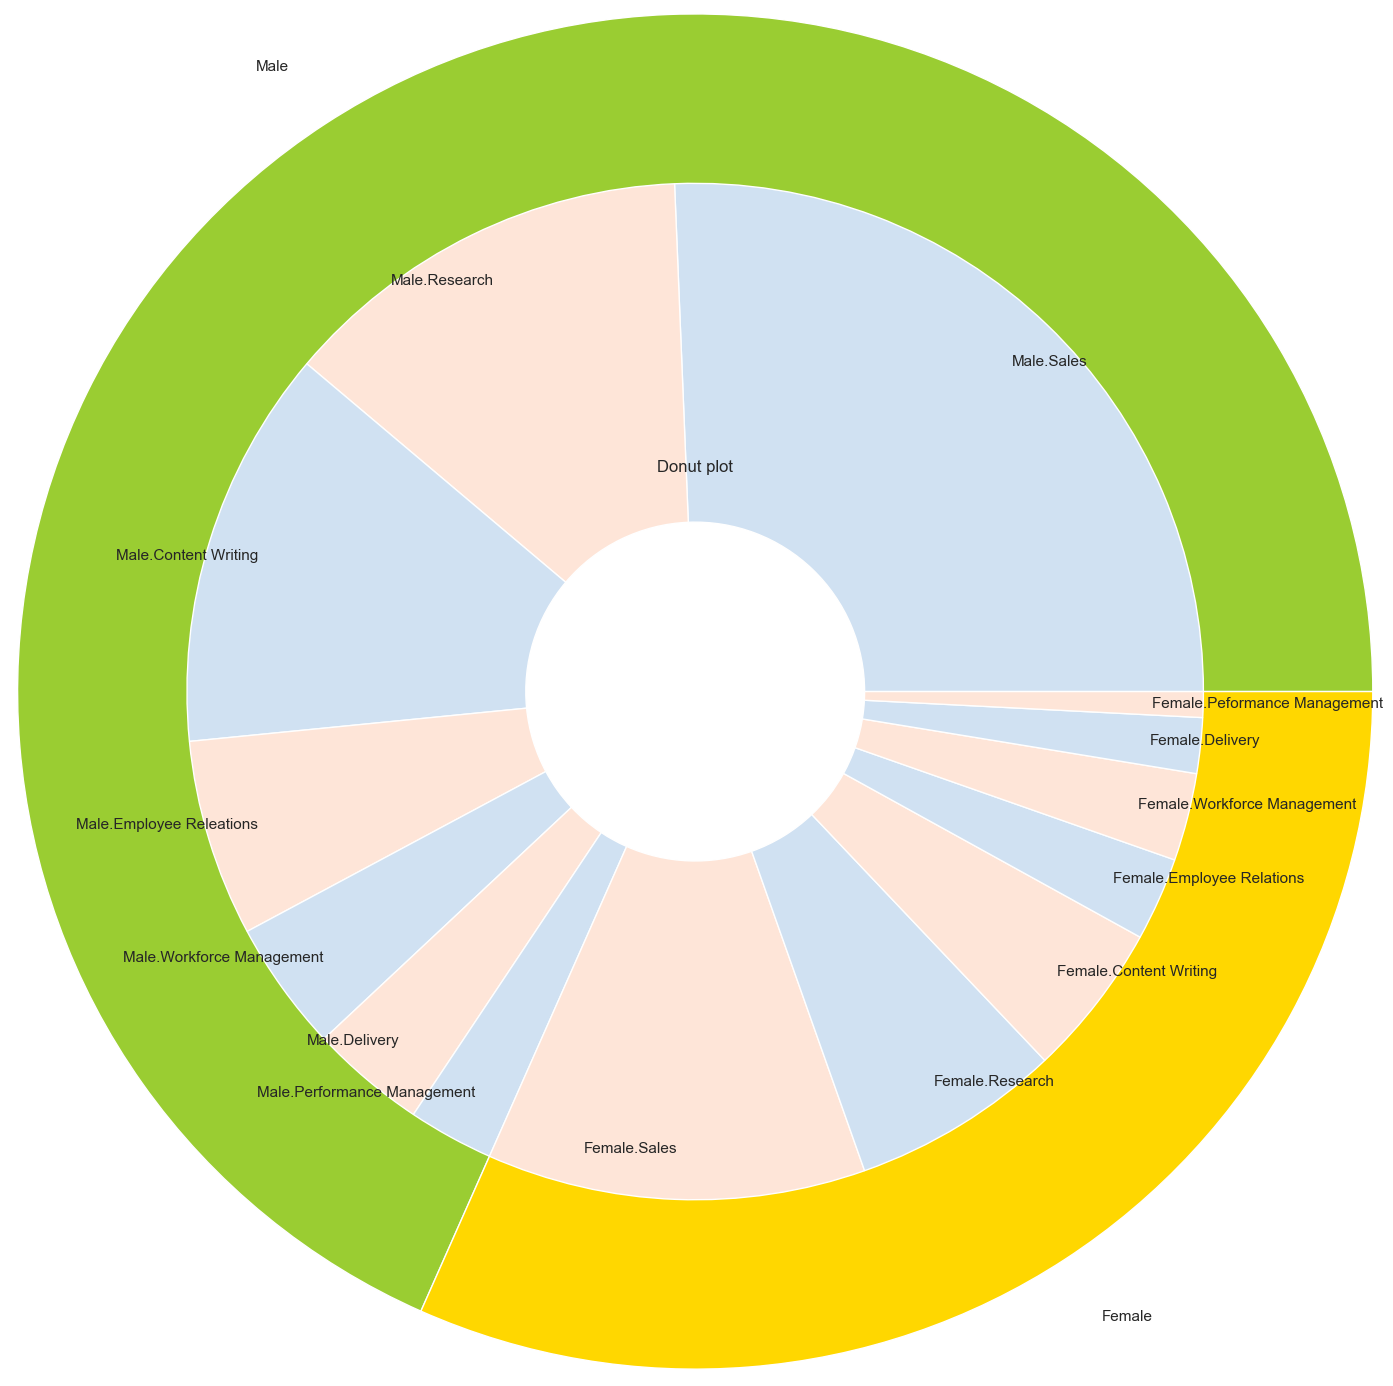

In [17]:
import matplotlib.pyplot as plt
 
# Make data: 
group_names=['Male', 'Female']
group_size=[1005,465]
subgroup_names=['Male.Sales','Male.Research','Male.Content Writing','Male.Employee Releations','Male.Workforce Management','Male.Delivery','Male.Performance Management','Female.Sales','Female.Research','Female.Content Writing','Female.Employee Relations','Female.Workforce Management','Female.Delivery','Female.Peformance Management']
subgroup_size=[377,194,187,92,61,54,40,177,98,72,39,41,26,12]

    
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=4, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=2, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=3.3-0.3, labels=subgroup_names, labeldistance=.9, colors= [plt.cm.Blues(0.2), plt.cm.Reds(0.1)])
plt.setp( mypie2, width=2, edgecolor='white')
plt.margins(0,0)
plt.title('Donut plot')
# show it
plt.show()


C:\Users\Baba\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Factor plot for male and female ratios falling under different skill sets present in the organisation')

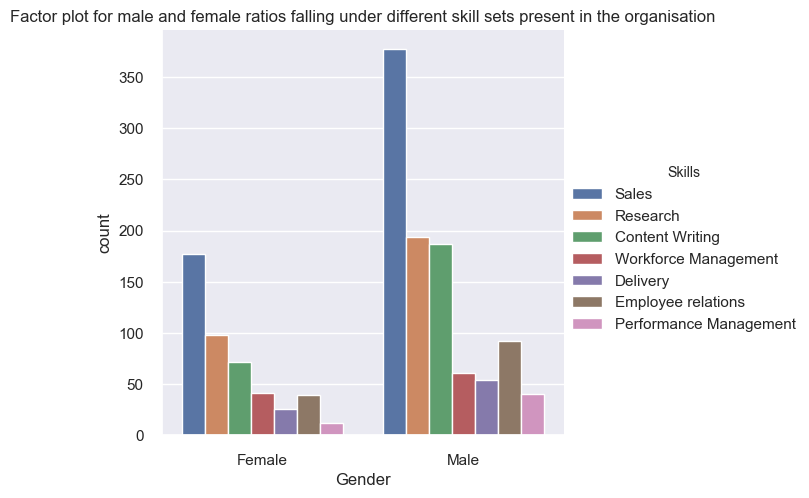

In [18]:
sns.factorplot('Gender',hue='Skills',kind='count',data=employee_data)
plt.title("Factor plot for male and female ratios falling under different skill sets present in the organisation")

So from the above donut pie chart and the factor plot its quite clear that we have points
1.) Organisation has got the maximum number of employee population the Sales department for both Male and Females.
2.) The second largest population lies in the Research deparment for both Male and Female.
3.) The third largest population lies in the Content Writing department for both Male and Female.
4.) We have lowest population in Performance Management.

<a id="section405"/>

### 4.5 What is the distribution of ratings based on the Skill Sets? Does Rating depends on Skill Sets?

C:\Users\Baba\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Baba\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Factor plot for male and female ratios falling under different skill sets present in the organisation')

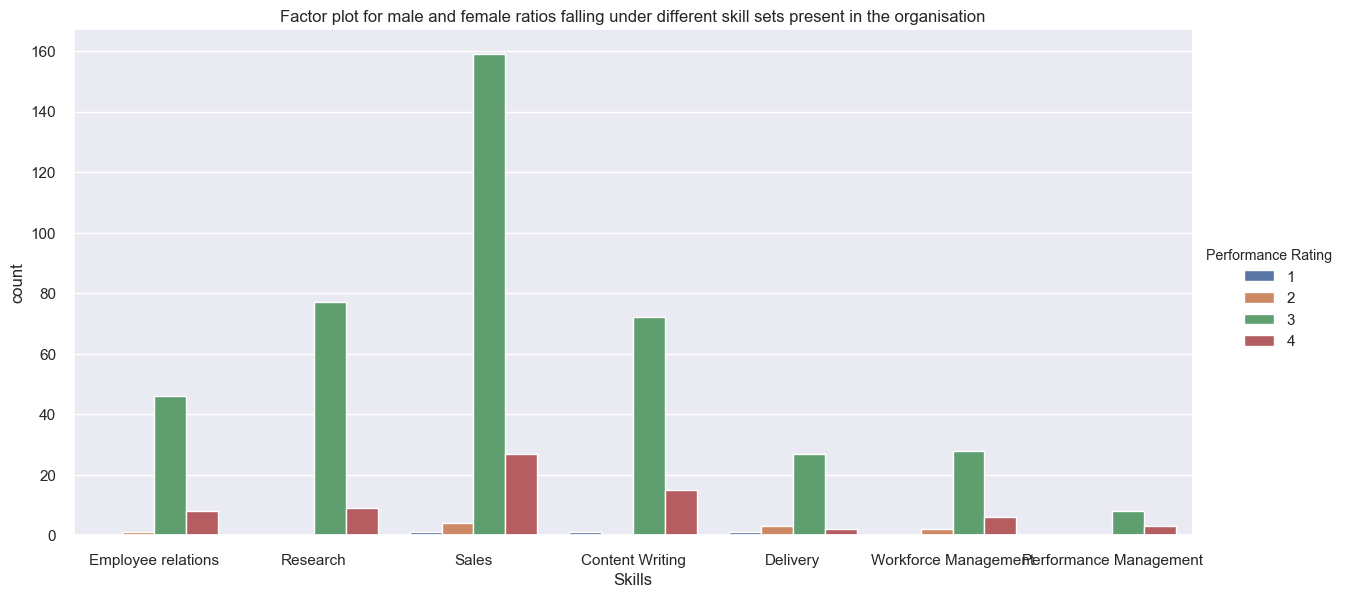

In [19]:
sns.factorplot('Skills',hue='Performance Rating',kind='count',data=employee_data.sample(500), size=6, aspect=2)
plt.title("Factor plot for male and female ratios falling under different skill sets present in the organisation")

As evident from the above graph it seems that there is no impact of the skill set on the rating.
We do see a higher counts for both 3 and 4 ratings on the sales department but that's because as we have already seen
the Sales is the department where most of our employee population lies. 

<a id="section406"/>

### 4.6 What are the ratios of people falling under the different buckets of performance ratings?

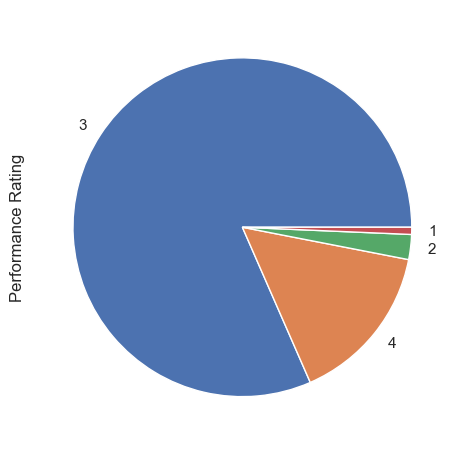

In [20]:
employee_data["Performance Rating"].value_counts().plot.pie()

If we look into the above graph everytime we are looking into 1,2,3,4 as ratings we have to do an additional task of correlating these figures to the 'Objective Performance Rating' in order to understand what does a 4 mean what does a 3 mean etc.
So in order to simplify this what we will do is we will map all these numerical performance ratings to the 'Objective Performance ratings' and store them in a seperate new column in our data set and then plot a graph on it.
In this manner even a layman looking at our graph will be able to quickly understand how are the employees performing.
So for this purpose we will be using the below mapping criteria which is common culture around most of the companies
4--> Above Expectations--> Employee has gone beyond his designated jobs and done something outstanding which has benefitted the business.
3--> Meets Expectations--> Whatever Employee was designated to do he/she has satisfactorly completed his/her job.
2--> Below Expectations--> Whatever Employee was designated to do he/she has not satisfactorly completed his/her job.
1--> Performance Improvement Plan--> Employee needs significant improvement and needs to go through PIP.

In [47]:
employee_data['Objective Performance Rating'] = employee_data.apply(lambda x: 'Above Expectations' if x['Performance Rating'] ==4 else 'Meets Expectation' if x['Performance Rating']==3 else 'Below Expectation' if x['Performance Rating']==2 else 'Performance Improvement Plan' if x['Performance Rating']==1 else '',axis=1)   
employee_data.head()

,Gender,Employee Number,Skills,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2017),Objective Performance Rating
0,Female,1,Sales,8,1,3,6,5993,5893,Meets Expectation
1,Female,5,Research,8,3,3,8,5130,4000,Meets Expectation
2,Female,10,Content Writing,12,2,4,1,2090,3050,Above Expectations
3,Female,15,Content Writing,10,3,3,9,2909,5909,Meets Expectation
4,Female,20,Sales,10,3,2,10,3468,2468,Below Expectation


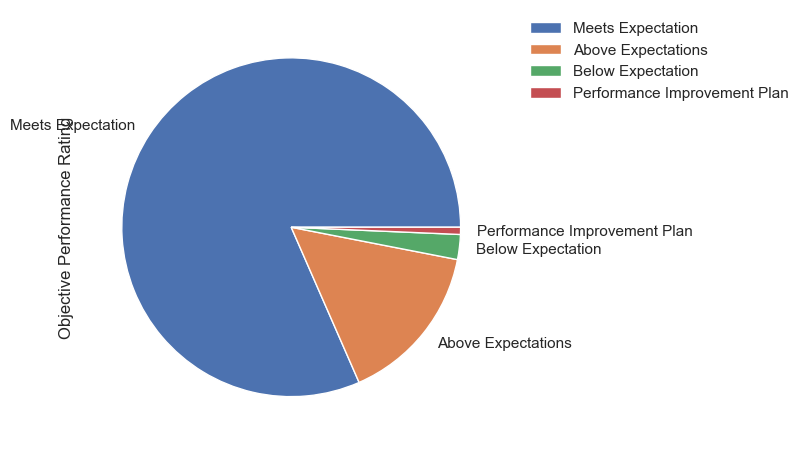

In [22]:
g = employee_data["Objective Performance Rating"].value_counts().plot.pie()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)# to bring the legend out of the plot so that its readable

So we can now see how beautifully the above plot is explaining us that most of the employees are falling under the rating of 
"Meets Expectation". And management can very easily decide on the basis of the above graphs how we can try to pull the more 
and more people to come out of their comfort zone and jump to the "Above Expectations" area by various awareness programmes.
Also it will help the management to quickly identify if there are many people who are performing below expectations and what 
can be done to improve their performance.

<a id="section407"/>

### 4.7 How is the work life balance in the organisation?

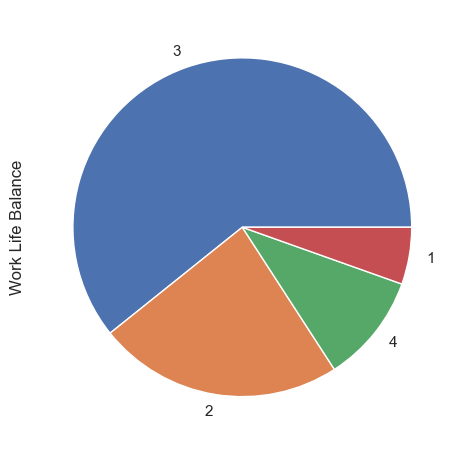

In [23]:
employee_data['Work Life Balance'].value_counts().plot.pie()

If we look into the above graph everytime we are looking into 1,2,3,4 as "Work Life Balance" we have to do an 
additional task of correlating these figures to the 'Objective Work Life Balance ' in order to understand
what does a 4 mean what does a 3 mean etc.
So in order to simplify this what we will do is we will map all these numerical "Work Life Balance" to 
the 'Objective Work Life Balance' and store them in a seperate new column in our data set and then plot a graph on it.
In this manner even a layman looking at our graph will be able to quickly understand "Work Life Balance" in organisation.
So for this purpose we will be using the below mapping criteria which is common culture around most of the companies
1 Poor
2 Average
3 Good
4 Excellent

In [24]:
employee_data['Objective Work Life Balance'] = employee_data.apply(lambda x: 'Excellent' if x['Work Life Balance']==4 else 'Good' if x['Work Life Balance']==3 else 'Average' if x['Work Life Balance']==2 else 'Poor' if x['Work Life Balance']==1 else '' ,axis=1)
employee_data.head()

,Gender,Employee Number,Skills,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2017),#VALUE!,Objective Performance Rating,Objective Work Life Balance
0,Female,1,Sales,8,1,3,6,5993,5893,NaN,Meets Expectation,Poor
1,Female,5,Research,8,3,3,8,5130,4000,NaN,Meets Expectation,Good
2,Female,10,Content Writing,12,2,4,1,2090,3050,NaN,Above Expectations,Average
3,Female,15,Content Writing,10,3,3,9,2909,5909,NaN,Meets Expectation,Good
4,Female,20,Sales,10,3,2,10,3468,2468,NaN,Below Expectation,Good


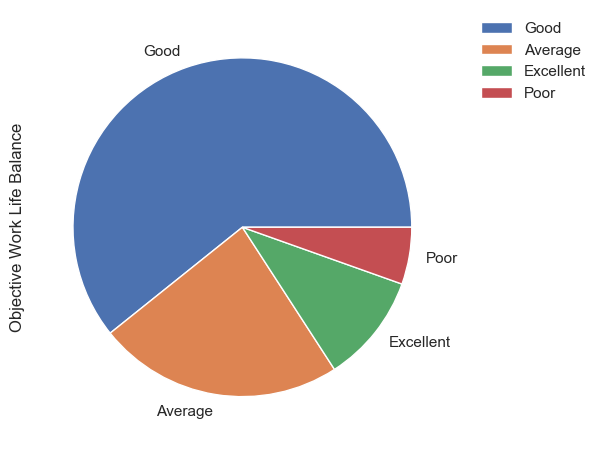

In [25]:
g = employee_data["Objective Work Life Balance"].value_counts().plot.pie()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)# to bring the legend out of the plot so that its readable

So if we see the above graph it seems most of the employees have rated the "Work life balance" to be "Good" And
people with "Poor" and "Excellent" are few.

<a id="section408"/>

### 4.8 What is the impact of Gender or "Total Experience" on the Monthly Income?

C:\Users\Baba\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Baba\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


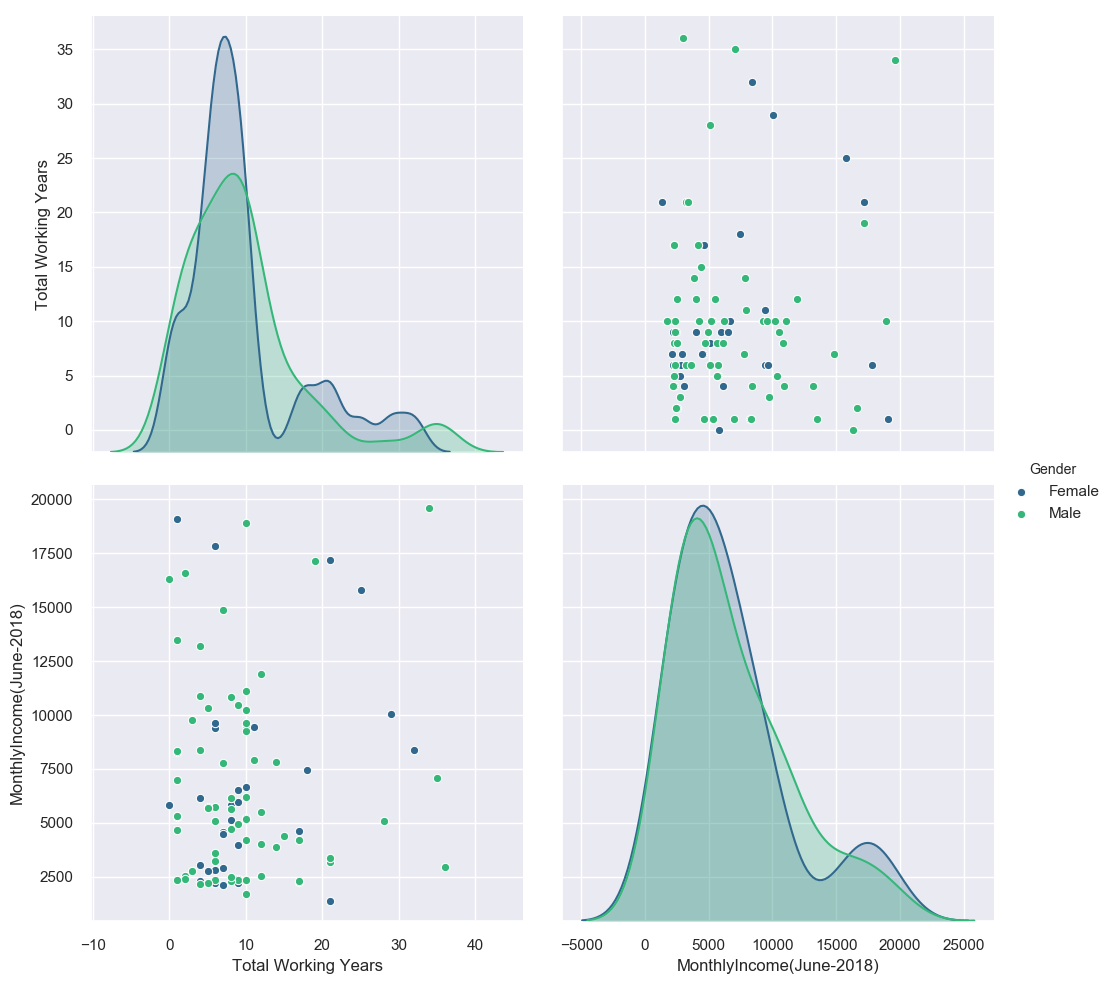

In [26]:
sns.pairplot(employee_data[['Total Working Years','MonthlyIncome(June-2018)','Gender']].sample(100),hue='Gender',palette="viridis", size=5)

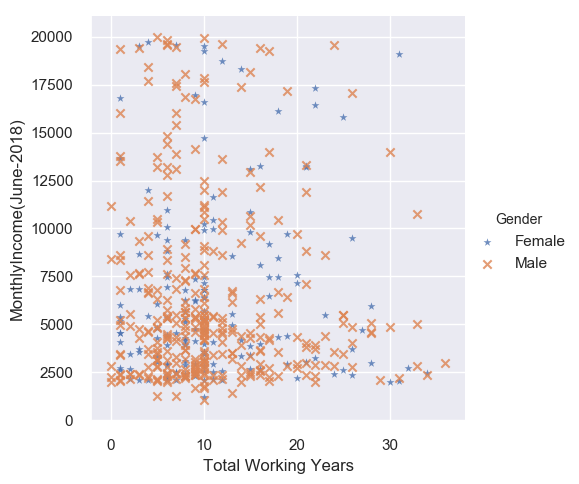

In [27]:
sns.lmplot(x='Total Working Years',y='MonthlyIncome(June-2018)',
           markers =['*','x'],hue='Gender',data=employee_data.sample(500),fit_reg=False)

So from the Above graphs its quite clear that neither the Gender neither the Total Years of experience is much impacting the Income factor. Its quite evident that people at lower experiences too have higher income and people with higher experiences too can lower income. Also the Company is not gender biased the income dosen't depends upon your gender. 

<a id="section409"/>

### 4.9 Who has got better ratings Females or Males?

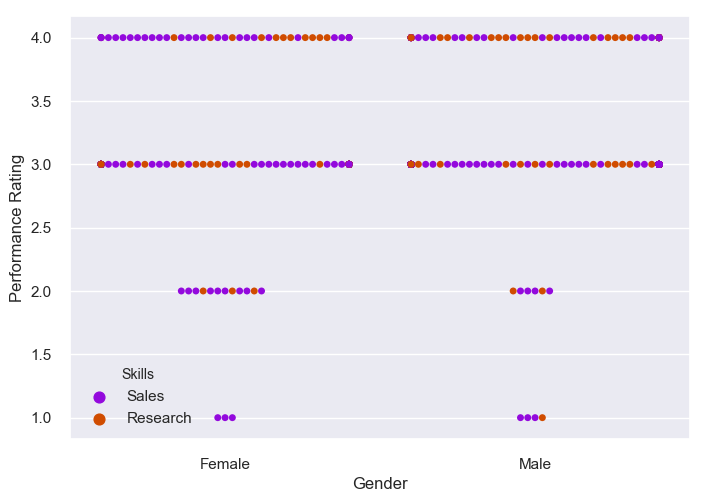

In [53]:
sns.swarmplot(x="Gender",y="Performance Rating",hue="Skills",palette="gnuplot",
              data=employee_data.loc[employee_data['Skills'].isin(['Sales','Research'])])

Here we have taken just the sample employees from Sales and Research dept as we have
maximum employees in these two departments.
Also from the graph above its quite evident that Female and Males have almost similar
range of ratings apart from the rating 2(Which stands for unsatisfactory performance)

<a id="section410"/>

### 4.10 Does the 'Years at Company' is impacted by 'Total Years of Experience' ?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


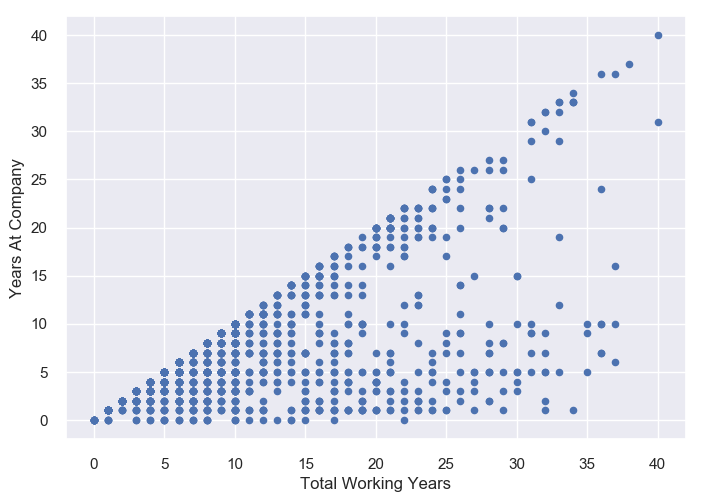

In [29]:
employee_data.plot.scatter(x='Total Working Years',y='Years At Company')

Here from the above graph its quite evident that the 'Years at Company' is highly
positively correlated to 'Total Working Years'. It seems once the years of experience 
grows up people want to get settled and get growth in the same organisation instead of
trying out new organisation.

<a id="section411"/>

### 4.11 What is the average hike amount people have got in monthly income based on ratings.

In [55]:
employee_data['Hike Amount']=employee_data['MonthlyIncome(June-2018)']-employee_data['MonthlyIncome(June-2017)']

In [57]:
employee_data

,Gender,Employee Number,Skills,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2017),Objective Performance Rating,Hike Amount
0,Female,1,Sales,8,1,3,6,5993,5893,Meets Expectation,100
1,Female,5,Research,8,3,3,8,5130,4000,Meets Expectation,1130
2,Female,10,Content Writing,12,2,4,1,2090,3050,Above Expectations,-960
3,Female,15,Content Writing,10,3,3,9,2909,5909,Meets Expectation,-3000
4,Female,20,Sales,10,3,2,10,3468,2468,Below Expectation,1000
5,Female,23,Workforce Management,31,3,2,25,3068,2068,Below Expectation,1000
6,Female,26,Sales,5,2,2,4,2670,2670,Below Expectation,0
7,Female,28,Delivery,13,3,2,12,2693,2693,Below Expectation,0
8,Female,32,Workforce Management,26,2,3,14,9526,9526,Meets Expectation,0
9,Female,33,Research,10,3,4,10,5237,5237,Above Expectations,0


In [62]:
len(employee_data[employee_data['Hike Amount'] == 0])

1462

In [63]:
len(employee_data[employee_data['Hike Amount'] > 0])

5

In [64]:
len(employee_data[employee_data['Hike Amount'] < 0])

3

In [69]:
len(employee_data['Hike Amount'])

1470

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


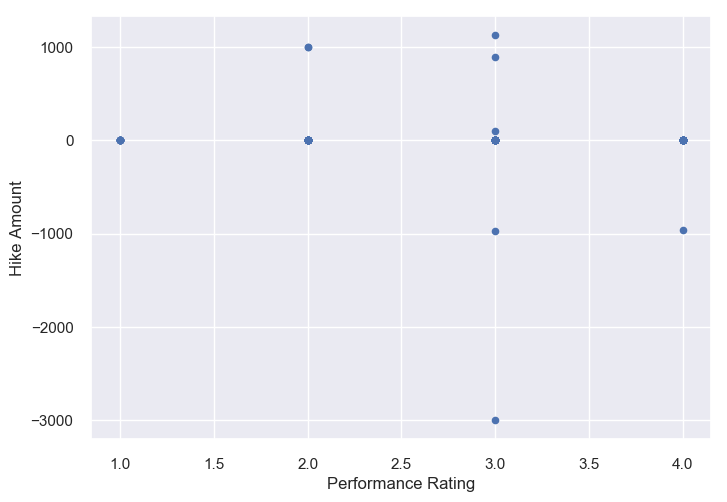

In [73]:
employee_data.plot.scatter(x='Performance Rating',y='Hike Amount')

So from the above analysis we understand that:
    1.) The count of employees having 0 hike is 1462(Which is a huge population), the count of employee having -ve hike is 3 and count of employee having
    positive hike is just 5.
    2.) This shows that almost everyone in the company has not got any hike. Only 5 people have got the hike there should be some reason for it which we can't derive from the existing dataset.
    3.) Also we tried to understand the relation between the rating of the employee and the hike but there is no relation between these two fields as the large population with rating 1 has also got 0 hik and having 4 rating have also received 0 hikes.

<a id=section5></a>

### 5. Observations/Conclusions